<a href="https://colab.research.google.com/github/adams-gc/BF-python-class/blob/main/knn__covid_classification_svm_for_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('/content/corona_tested_006.csv')
data.head()

<ipython-input-2-2f6ec61eb0ff>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  278848
No of col =  11


In [ ]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
# data = data.drop(['Age_60_above','Sex'], axis = 1)

In [ ]:
data = data.dropna()


In [ ]:
data.shape

(278594, 9)

In [ ]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool').astype('int')
data['Fever'] = data['Fever'].astype('bool').astype('int')
data['Sore_throat'] = data['Sore_throat'].astype('bool').astype('int')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool').astype('int')
data['Headache'] = data['Headache'].astype('bool').astype('int')
# data['Age_60_above'] = data['Age_60_above'].astype('bool')
# data['Sex'] = data['Sex'].astype('bool')
# data['Known_contact'] = data['Known_contact'].astype('bool')

In [ ]:
# data.describe()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,positive,Other
278844,278845,30-04-2020,0,0,0,0,0,negative,Other
278845,278846,30-04-2020,0,0,0,0,0,negative,Other
278846,278847,30-04-2020,0,0,0,0,0,negative,Other


In [ ]:
print(len(data[data['Corona'] == 'other']))
print(len(data[data['Corona'] == 'negative']))
print(len(data[data['Corona'] == 'positive']))

3892
260008
14694


In [ ]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,positive,Other
278844,278845,30-04-2020,0,0,0,0,0,negative,Other
278845,278846,30-04-2020,0,0,0,0,0,negative,Other
278846,278847,30-04-2020,0,0,0,0,0,negative,Other


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274702 non-null  int64 
 1   Test_date            274702 non-null  object
 2   Cough_symptoms       274702 non-null  int64 
 3   Fever                274702 non-null  int64 
 4   Sore_throat          274702 non-null  int64 
 5   Shortness_of_breath  274702 non-null  int64 
 6   Headache             274702 non-null  int64 
 7   Corona               274702 non-null  object
 8   Known_contact        274702 non-null  object
dtypes: int64(6), object(3)
memory usage: 21.0+ MB


In [ ]:
data = data.iloc[:,2:]

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,negative,Abroad
1,0,1,0,0,0,positive,Abroad
2,0,1,0,0,0,positive,Abroad
3,1,0,0,0,0,negative,Abroad
4,1,0,0,0,0,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,positive,Other
278844,0,0,0,0,0,negative,Other
278845,0,0,0,0,0,negative,Other
278846,0,0,0,0,0,negative,Other


In [ ]:
data = data.dropna()
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,negative,Abroad
1,0,1,0,0,0,positive,Abroad
2,0,1,0,0,0,positive,Abroad
3,1,0,0,0,0,negative,Abroad
4,1,0,0,0,0,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,positive,Other
278844,0,0,0,0,0,negative,Other
278845,0,0,0,0,0,negative,Other
278846,0,0,0,0,0,negative,Other


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
# data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
# data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2
278844,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,2
278846,0,0,0,0,0,0,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       274702 non-null  int64
 1   Fever                274702 non-null  int64
 2   Sore_throat          274702 non-null  int64
 3   Shortness_of_breath  274702 non-null  int64
 4   Headache             274702 non-null  int64
 5   Corona               274702 non-null  int64
 6   Known_contact        274702 non-null  int64
dtypes: int64(7)
memory usage: 16.8 MB


In [ ]:
data.shape

(274702, 7)

In [ ]:
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:14694]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

14694
14694


In [ ]:
# data.shape

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
114547,1,1,0,0,0,1,1
113483,1,1,1,0,1,1,1
115515,0,0,0,0,0,1,2
7471,0,0,1,0,0,1,1
75439,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...
11961,0,0,0,0,0,0,2
13249,0,0,0,0,0,0,2
2182,1,0,0,0,0,0,0
3711,0,0,0,0,0,0,2


In [ ]:
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
9465,0,0,0,0,0,1,1
1573,0,0,0,0,0,0,2
13559,0,0,0,0,0,0,2
918,1,0,0,0,0,0,2
71247,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
268054,0,0,0,0,0,1,1
18343,0,1,1,0,1,1,2
11991,0,0,0,0,0,0,2
93172,0,0,0,0,0,1,1


In [ ]:
# data.describe()

In [ ]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
Cough_symptoms,1.000000,0.433573,0.207408,0.191323,0.206111,0.375701,-0.400597
Fever,0.433573,1.000000,0.159952,0.176067,0.244807,0.388702,-0.263129
Sore_throat,0.207408,0.159952,1.000000,0.149096,0.281005,0.185964,-0.138794
Shortness_of_breath,0.191323,0.176067,0.149096,1.000000,0.153682,0.137521,-0.115547
Headache,0.206111,0.244807,0.281005,0.153682,1.000000,0.277294,-0.143398
Corona,0.375701,0.388702,0.185964,0.137521,0.277294,1.000000,-0.426096
Known_contact,-0.400597,-0.263129,-0.138794,-0.115547,-0.143398,-0.426096,1.000000


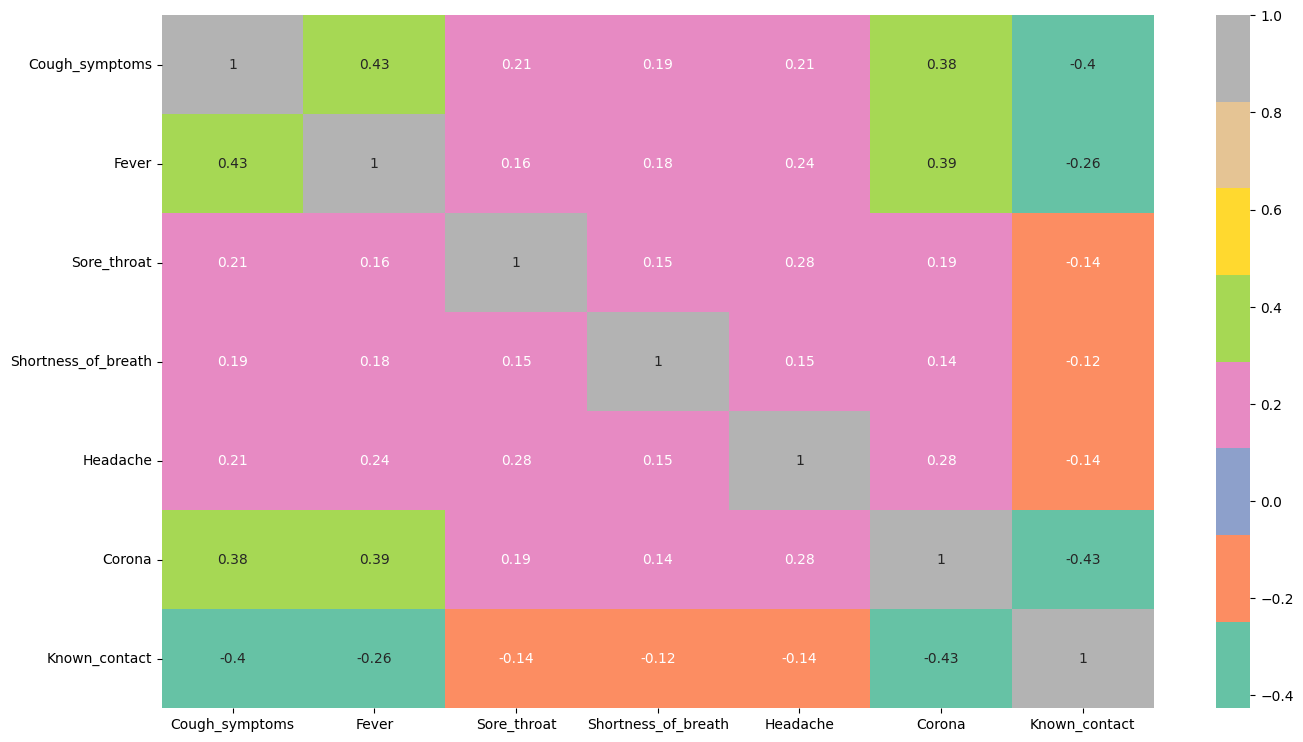

In [ ]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [ ]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Known_contact'],
      dtype='object')

In [ ]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
Y = data['Corona']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
# def roc_curve(Y_test, Y_score):
#     from sklearn.metrics import roc_curve, auc
#     fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
#     score = metrics.auc(fpr, tpr)

#     fig = px.area(
#         #fpr = False Positive Rate; tpr= True Positive Rate
#         x=fpr, y=tpr,
#         title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#         labels=dict(x='False Positive Rate', y='True Positive Rate'),
#         width=700, height=500
#     )

#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



SVC()

In [ ]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
8126,0,0,0,0,0,2
11168,0,0,0,0,0,2
4624,0,0,0,0,0,2
7208,0,0,0,0,0,2
12317,0,0,0,0,0,2
...,...,...,...,...,...,...
784,0,0,0,0,0,2
105191,1,1,1,0,1,1
15402,0,0,0,0,0,2
24221,0,0,0,0,0,2


In [ ]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#test aucc
test_svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
test_svc_accuracy

85.61

In [ ]:
#Train aucc
train_svc_accuracy= round(accuracy_score(Y_train,svc.predict(X_train)), 4)*100 # Accuracy
train_svc_accuracy

85.44

In [ ]:
# Y_pred = svc.predict(X_test)


In [ ]:
#to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(svc, open(filename, 'wb'))

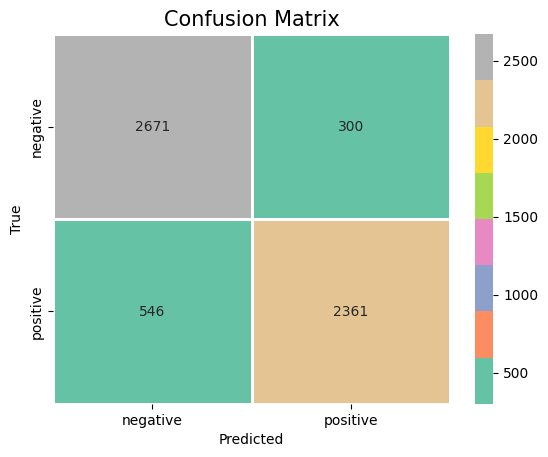

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[2671,  300],
       [ 546, 2361]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2971
           1       0.89      0.81      0.85      2907

    accuracy                           0.86      5878
   macro avg       0.86      0.86      0.86      5878
weighted avg       0.86      0.86      0.86      5878



In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)
lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

83.63000000000001

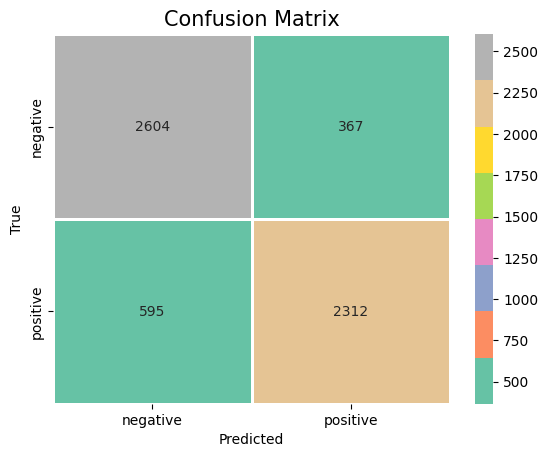

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score

test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

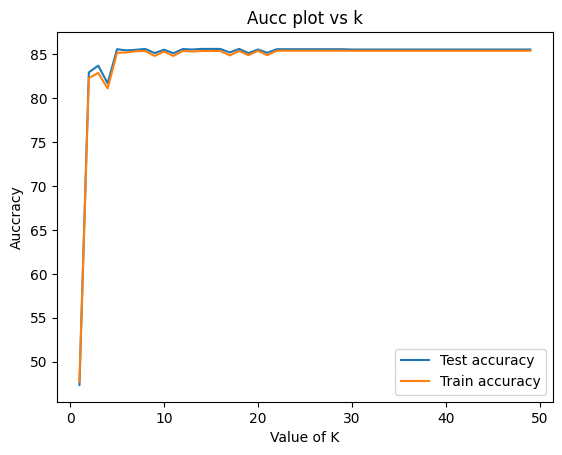

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

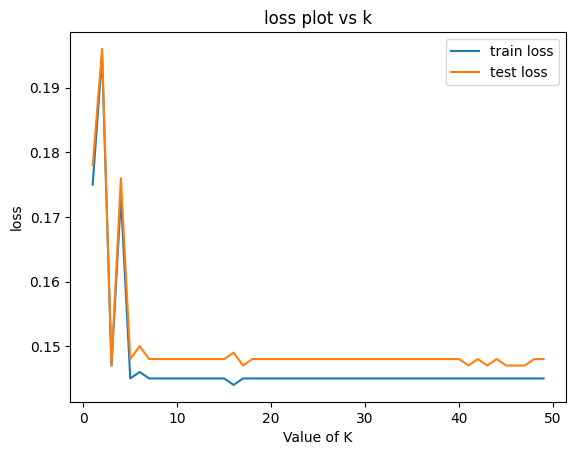

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# test accu
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

85.573


In [ ]:
#train accu
Y_pred_train= KNN.predict(X_train)
KNN_accuracy= round(accuracy_score(Y_train,Y_pred_train), 5)*100 # Accuracy
print(KNN_accuracy)

85.168


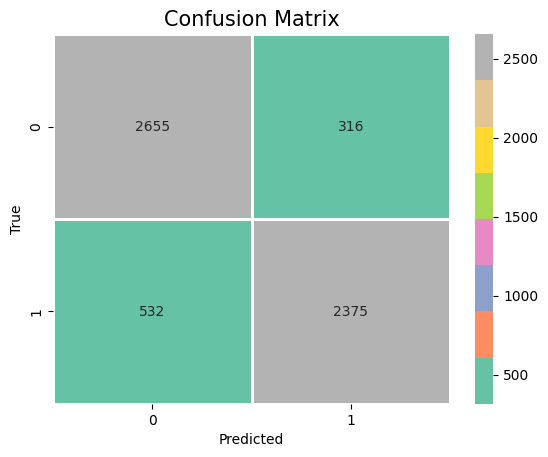

In [ ]:


cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

